<a href="https://colab.research.google.com/github/wilaipa/KKU_data_mining/blob/master/Final_Exam_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. จากข้อมูล (```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv```) ใน http://qr.tebs.io/6zqwEf สร้าง model เพื่อทำนาย (Classification) ว่าผลการ search เป็นร้านอาหารหรือไม่(```is_food = = True```) โดยพิจารณาจาก 
- วันในสัปดาห์ที่ทำการ search (```Monday-Sunday```) 
- วันในที่ทำการ search (```1-31```)
- เวลาที่ทำการ search (```1-24```)

หมายเหตุที่ 1 สามารถใช้ function ที่ให้มาช่วยในการทำงานได้
1. ```extract_time()``` ซึ่ง input เป็น ```timestamp``` และ output เป็น ```เวลาที่ทำการ search``` ```วันในที่ทำการ search``` ```วันในสัปดาห์ที่ทำการ search```

2. ```is_food``` ซึ่ง input เป็น ```category_name``` และ ```output``` เป็น คำตอบว่า ```เป็นร้านอาหารหรือไม่```

หมายเหตุที่ 2 ควรเตรียมข้อมูลโดยรวมข้อมูลจาก ตาราง ```w_restaurant.csv```, ```search_click.csv```, ```search_request.csv``` ให้ได้ในรูปแบบ ต่อไปนี้
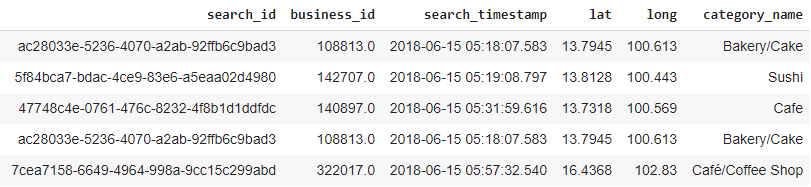

(200 คะแนน)

In [1]:
import datetime
def extract_time(datetime_s):
    EX_date = datetime.datetime.strptime(datetime_s, "%Y-%m-%d %H:%M:%S.%f")
    return EX_date.hour, EX_date.day, get_day(EX_date.weekday()) 

def get_day(D):
    weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
    return weekdays[D] 

def is_food(inp):
    food_list = ['Vegeterian','Sushi','Sukiyaki/Shabu','Street Food/Food Stands','Steak House/Barbeque','Southern Food','Seafood','Ramen','Quick Meal','Pizza','Northern Food','Noodles','Mexican','Korean',
             'Japanese','Italian','Izakaya','Healthy Food','German Food','Fusion Food','French','Food Truck','Fastfood','Dim Sum','Delivery Only','Chinese','Cafe','Café/Coffee Shop','Buffet',
             'Breakfast/Brunch','Bakery/Cake','Barbeque/Grill','American']
    return inp in food_list

In [4]:
import pandas

In [5]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os

In [7]:
w_restaurant = os.path.join(path,'w_restaurant.csv')
search_click = os.path.join(path,'search_click.csv')
search_request= os.path.join(path,'search_request.csv')

In [8]:
w_restaurant_df = pandas.read_csv(w_restaurant)

In [9]:
w_restaurant_df.head()

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery
0,2,à¸™à¸„à¸£à¸´à¸™à¸—à¸£à¹Œà¸—à¸±à¸™à¸•à¸à¸£à¸£à¸¡,2,0,Samut Songkhram,75000,w4rh7g3,0,5.000000,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN
1,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.000000,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,à¸§à¸±à¸”à¹‚à¸¥à¸à¸¢à¸ªà¸¸à¸˜à¸²à¸£à¸²à¸¡,4,0,Phra Nakhon Si Ayutthaya,13000,w4x98jk,0,4.000000,NaN,1.0,0,0,167,0,0,0,Historical/Religion,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,à¸™à¸±à¸™à¸—à¹Œà¸„à¸²à¸£à¸²à¹‚à¸­à¹€à¸à¸°,1,0,Bangkok Metropolitan Region,10700,w4rqw9q,0,0.000000,NaN,NaN,0,0,901,0,0,0,Karaoke,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Buono Caffe,1,0,Bangkok Metropolitan Region,10220,w4rx4gd,0,3.738462,NaN,15.0,3,0,2360,1,0,2,CafÃ©/Coffee Shop,1.0,NaN,1.0,0.0,NaN,NaN,NaN,NaN,1.0,2.0,NaN,NaN,NaN,NaN


In [10]:
search_click_df = pandas.read_csv(search_click)
search_click_df.head()

,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,11:38.9,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0,0,2.222400e+15,True
1,30:51.3,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0,0,4.608380e+14,True
2,32:09.6,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0,0,2.581490e+15,True
3,00:59.8,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0,1,1.404580e+15,True
4,23:36.8,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0,1,9.333590e+14,True


In [11]:
search_request_df = pandas.read_csv(search_request)
search_request_df.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (7,8,9) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,search_id,search_timestamp,user_agent,q,user_id,session_id,number_of_result,lat,long
0,0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,"Wongnai/8.17.3 rv:8.17.3.3921 (iPhone5,4; iOS;...",NaN,NaN,5lqjjikta19d296mo7g2h1k86p,18,12.6347,101.463
1,1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,Mozilla/5.0 (iPhone; CPU iPhone OS 11_4 like M...,NaN,NaN,1r3iotmp0o9slom91stdt9vivc,10,14.8009,102.534
2,2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,Mozilla/5.0 (Linux; Android 7.0; SAMSUNG SM-J7...,NaN,NaN,5ci1eo4v5u9dha4ppgu94ue7p6,8,13.7383,100.371
3,3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,Mozilla/5.0 (Linux; Android 7.1.1; SM-N950F Bu...,NaN,NaN,39n535qgje9kpojp0grhfj8umk,12,12.6669,101.861
4,4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,Mozilla/5.0 (iPhone; CPU iPhone OS 11_3_1 like...,NaN,NaN,5pa03h6lj691to60erver1l8o4,14,12.2372,99.88


In [12]:
merged_table = w_restaurant_df.merge(search_click_df,how='left',left_on='id',right_on='business_id')
merged_table

,id,name,domain_id,closed,city_name,zipcode,geohash,new_open,weighted_average_rating,number_of_chains,number_of_bookmarks,number_of_reviews,number_of_product_tags,total_number_of_views,number_of_checkins,number_of_menu_groups,number_of_menu_photos,category_name,price_range,avg_price,parking,credit_card_accepted,good_for_groups,good_for_kids,bookable,best_of_wongnai,wifi,number_of_seats,music_venue,hotel_restaurant,pet_friendly,delivery,click_timestamp,search_id,business_id,display_position,time_diff_nanos,ads
0,2,à¸™à¸„à¸£à¸´à¸™à¸—à¸£à¹Œà¸—à¸±à¸™à¸•à¸à¸£à¸£à¸¡,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,22:32.1,215436d1-0f4a-42e5-b67f-7ce6dd125db6,2.0,0.0,3.596598e+10,False
1,2,à¸™à¸„à¸£à¸´à¸™à¸—à¸£à¹Œà¸—à¸±à¸™à¸•à¸à¸£à¸£à¸¡,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,32:29.8,07763a18-c984-4c72-82ba-ea7d329f8616,2.0,3.0,1.129360e+16,False
2,2,à¸™à¸„à¸£à¸´à¸™à¸—à¸£à¹Œà¸—à¸±à¸™à¸•à¸à¸£à¸£à¸¡,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,32:29.8,68ace243-7053-44ee-94e8-9cb88b5980d2,2.0,3.0,1.142290e+16,False
3,2,à¸™à¸„à¸£à¸´à¸™à¸—à¸£à¹Œà¸—à¸±à¸™à¸•à¸à¸£à¸£à¸¡,2,0,Samut Songkhram,75000,w4rh7g3,0,5.0,NaN,NaN,1,0,3016,0,0,0,Orthodontic,NaN,NaN,3.0,0.0,NaN,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,35:21.3,efe5d76d-015a-4cd3-93a1-52eeb2c99766,2.0,0.0,7.382121e+10,False
4,4,Corner House,1,0,Bangkok Metropolitan Region,12150,w4rx73h,0,2.0,NaN,NaN,1,0,321,0,0,1,Quick Meal,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153529,340070,à¸ªà¸°à¸šà¸²à¸¢à¸”à¸µ à¸„à¸²à¸£à¸²à¹‚à¸­à¹€à¸à¸°,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.0,NaN,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,53:44.0,54090b95-5124-4820-a6a0-faad13e42ee9,340070.0,2.0,5.559611e+10,False
1153530,340070,à¸ªà¸°à¸šà¸²à¸¢à¸”à¸µ à¸„à¸²à¸£à¸²à¹‚à¸­à¹€à¸à¸°,1,0,Bangkok Metropolitan Region,NaN,w4rwjcg,0,0.0,NaN,1.0,0,0,537,1,0,0,Karaoke,1.0,NaN,3.0,0.0,1.0,NaN,1.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,53:37.6,54090b95-5124-4820-a6a0-faad13e42ee9,340070.0,2.0,4.916850e+10,False
1153531,340074,à¸ªà¹€à¸•à¹‡à¸à¹à¸¡à¹ˆ&à¸à¸²à¹à¸Ÿà¸¥à¸¹à¸,1,0,Bangkok Metropolitan Region,10160,w4rmvxf,0,4.0,NaN,11.0,1,0,1268,3,0,6,Steak House/Barbeque,2.0,NaN,1.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1153532,340079,Mom Made,1,0,Nakhon Si Thammarat,80000,w1x04g6,0,5.0,NaN,6.0,1,2,4031,0,0,2,CafÃ©/Coffee Shop,1.0,NaN,3.0,0.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
w_table = w_restaurant_df[['category_name','id']]
w_table

,category_name,id
0,Orthodontic,2
1,Quick Meal,4
2,Historical/Religion,5
3,Karaoke,6
4,CafÃ©/Coffee Shop,7
...,...,...
246842,Sushi,340068
246843,Karaoke,340070
246844,Steak House/Barbeque,340074
246845,CafÃ©/Coffee Shop,340079


In [23]:
s_table = search_click_df[['search_id','business_id']]
s_table

,search_id,business_id
0,5c004472-5ecc-4159-9698-9f329b8e26e1,298839.0
1,5f34eca0-c04e-4c10-b600-54aa447dbd8e,171372.0
2,8dc6d1f0-11f1-4239-9dd2-5c1674c81224,16157.0
3,1a5810e9-3d1f-44b9-9a2e-26ede21c524b,89741.0
4,6bc75e0d-fc65-471e-9926-ff6be6708639,189564.0
...,...,...
1048570,99aab616-6fc5-4fbf-994b-4aebee7bb360,278479.0
1048571,d70a2c5d-ee94-4e4c-9f7c-c5faac6db12a,321885.0
1048572,4c1de7fe-300e-41aa-9d01-914344fc3753,221035.0
1048573,2ec0ddec-e450-4b98-9779-42b77aa7eda5,220572.0


In [15]:
r_table = search_request_df[['search_id','search_timestamp','lat','long']]
r_table

,search_id,search_timestamp,lat,long
0,683de889-f923-494e-9d46-44a3d67b7259,2018-06-14 12:34:35.449,12.6347,101.463
1,4a811230-ffa4-4631-a4c8-5d0394137d02,2018-06-14 17:11:19.469,14.8009,102.534
2,7ad6ee8e-438e-4bea-9183-74dcef9e358e,2018-06-14 13:22:31.736,13.7383,100.371
3,0c17a5f5-fa89-40f4-ae94-a8659268f827,2018-06-02 12:37:27.331,12.6669,101.861
4,6870dc3a-5602-44fc-80ed-df0a7783df9d,2018-06-02 11:19:22.404,12.2372,99.88
...,...,...,...,...
10004352,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,2018-06-24 09:23:57.777,NaN,NaN
10004353,66cc94db-217a-4d8e-aa20-b1d10e17c968,2018-06-24 17:03:39.908,NaN,NaN
10004354,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,2018-06-24 19:17:55.797,NaN,NaN
10004355,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,2018-06-24 16:53:06.067,NaN,NaN


In [25]:
pd_concat = pandas.concat([w_table,s_table,r_table])
pd_concat

,category_name,id,search_id,business_id,search_timestamp,lat,long
0,Orthodontic,2.0,NaN,NaN,NaN,NaN,NaN
1,Quick Meal,4.0,NaN,NaN,NaN,NaN,NaN
2,Historical/Religion,5.0,NaN,NaN,NaN,NaN,NaN
3,Karaoke,6.0,NaN,NaN,NaN,NaN,NaN
4,CafÃ©/Coffee Shop,7.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10004352,NaN,NaN,5d8c10aa-63cf-4bdd-ab01-0af17a98781f,NaN,2018-06-24 09:23:57.777,NaN,NaN
10004353,NaN,NaN,66cc94db-217a-4d8e-aa20-b1d10e17c968,NaN,2018-06-24 17:03:39.908,NaN,NaN
10004354,NaN,NaN,4eb3b514-fb71-4dfe-a580-c560e8c9dcc7,NaN,2018-06-24 19:17:55.797,NaN,NaN
10004355,NaN,NaN,f5554532-2eb1-4ba6-a98e-1e10b2174d2c,NaN,2018-06-24 16:53:06.067,NaN,NaN


2. จากข้อมูล (```reduced_marketbasket.csv```) ใน http://qr.tebs.io/6zqwEf ให้เปรียบเทียบ รูปแบบ การซื้อที่น่าสนใจเป็นราย Transaction ของประชากรใน ประเทศ ```United Kingdom``` กับ ประเทศอื่นๆ (```'Country'!='United Kingdom'```)

(80 คะแนน)

In [39]:
import pandas as pd

In [40]:
from google.colab import drive
drive.mount('/content/drive')

path = '/content/drive/My Drive/DWDM_material'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
import os
data = pd.read_csv(os.path.join (path,'reduced_marketbasket.csv'),encoding='latin1')
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/09/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/09/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/09/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/09/2011 12:50,4.15,12680.0,France


In [42]:
data.groupby('Country').sum().sort_values('Quantity')



,Quantity,UnitPrice,CustomerID
Country,,,
Saudi Arabia,75,2.411000e+01,1.256500e+05
Bahrain,260,8.657000e+01,2.100270e+05
RSA,352,2.481000e+02,7.218680e+05
Brazil,356,1.426000e+02,4.086080e+05
Lebanon,386,2.424400e+02,5.743800e+05
European Community,497,2.940500e+02,9.215880e+05
Czech Republic,592,8.815000e+01,3.834300e+05
Lithuania,652,9.944000e+01,5.366200e+05
Malta,944,6.660100e+02,2.158496e+06


In [44]:
transacs = data.groupby('InvoiceNo')['StockCode'].apply(list)
transacs

InvoiceNo
536365     [85123A, 71053, 84406B, 84029G, 84029E, 22752,...
536366                                        [22633, 22632]
536367     [84879, 22745, 22748, 22749, 22310, 84969, 226...
536368                          [22960, 22913, 22912, 22914]
536369                                               [21756]
                                 ...                        
C581484                                              [23843]
C581490                                       [22178, 23144]
C581499                                                  [M]
C581568                                              [21258]
C581569                                       [84978, 20979]
Name: StockCode, Length: 25900, dtype: object

3. เขียนคำศัพท์ที่ได้เรียนในวิชาพร้อมทั้งคำนิยามที่เป็นคำพูดของนักศึกษาเอง (ห้าม search google) 20 คำ

(คำละ 0.5 คะแนน)

1. import pandas - การเรียกใช้ package ที่ชื่อ pandas

2. (import pandas) as pd - เปลี่ยนชื่อจาก pandas เป็น pd

3. from google.colab import drive - นำไฟล์จาก drive มาที่ google colab

4. path - สร้างตัวแปรเก็บโฟลเดอร์ที่เราต้องการ

5. from matplotlib - คำสั่งนำเข้าข้อมูลที่มีอยู่ที่เป็นตัวเลข ให้นำเข้ามาเป็นกราฟ

6. len(list_a) - นับจำนวนสมาชิกในลิสต์นั้นๆ

7. 
print - แสดงจำนวนในลิสต์

8. return - ส่งตัวแปรกลับมา

9. data.head() - แสดงหัวข้อตาราง

10. merge - การรวมตารางเข้าด้วยกัน

11. groupby - จัดกลุ่มข้อมูลในแต่ละตาราง

12. Define - ระบุข้อมูลที่นำเข้ามา

13. Classification - การจุดกลุ่มข้อมูล

14. Association - การหาความสัมพันธ์ของข้อมูล

15. mean - ค่าเฉลี่ยของข้อมูลในตาราง

16. missing - ข้อมูลที่หายไป

17. split - แยกสมาชิกข้อมูลออก

18. map - การเพิ่มคอลัมน์โดยการใช้แมพ โดยแมพตารางแต่ละตารางที่ต้องการ แล้วเลือกเอาคอลัมน์ที่สนใจ

19. shape - รูปแบบของข้อมูล เช่น ข้อมูลในตารางนี้มี 1000 ชุด กับ 5 คอลัมน์ จะได้ outout เป็น (1000,5)

20.sum - ผลรวมของข้อมูลในตาราง